## Answer 1A) 
In Excel we can observe that the maximum profit that can be gained is 5520$.
By producing 360 dozen baseballs and 300 dozen softballs, under the given constraints.



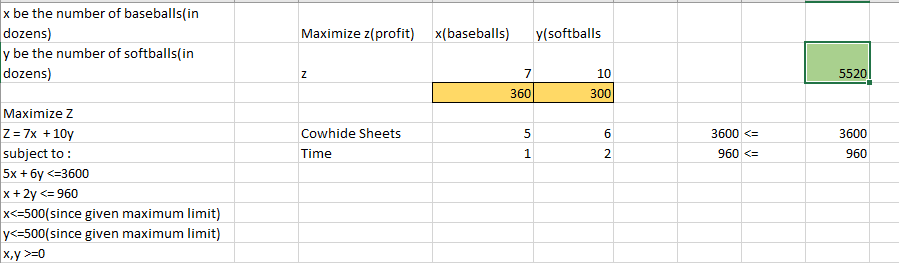


## Answer 1B)
(in Sensitivity Report in Excel)

Cost Coefficient Sensitivity Analysis:

Here in the sensitivity analysis ,

The coefficeint for baseballs was 7 i.e selling price is 7 dollars per one dozen baseballs.
It can be increased to 8.33 dollars per one dozen baseballs

AND

The coefficeint for softballs was 10 i.e selling price is 10 dollars per one dozen softballs.
It can be increased to 14 dollars per one dozen softballs


### Result : If this happens we can get 7188 dollars profit 

And the coefficients can be decreased to 5 and 8.4 i.e it can be sold for that price

### Result : If this happens we can get 4320 dollars profit



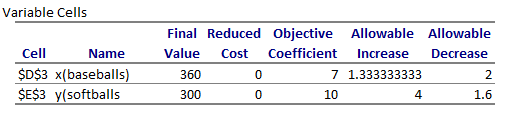

## Answer 1C)
(in Sensitivity Report in Excel)

Right Hand Side Sensitivity Analysis:

The Cowhide Sheets limit can be extended 1200 units more and can be decreased by 720 units!

The the total time for manufacturing both the products can be increased and decreased by 240 units!


And Shadow price for Cowhide Sheets is 1 unit that means one unit of cowhide sheet is 1 dollars and 1 unit of time is 2 dollars..

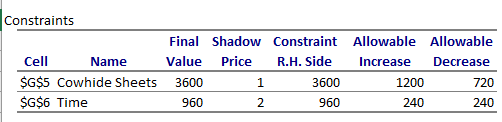

# Answer 1D)

<h3>
Z = 7x1 + 10x2
    
    subject to:
        5x1 + 6x2 <= 3600
        x1 + 2x2 <= 960              
    
</h3>

In [96]:
from scipy.optimize import LinearConstraint 
linear_constraint = LinearConstraint([[5, 6], [1, 2]], [0, 3600], [0,960])

In [104]:
from scipy import optimize

optimize.linprog([7,10])

     con: array([], dtype=float64)
     fun: 0.0
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0., 0.])

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Answer 2b) 


$$ f(x,y) = 4x + 6y -2x^2 - 2xy - 2y^2$$ 

## Iterative Technique (Gradient Ascent) to find the maxima

In [54]:
import numpy as np

In [55]:
# Gradient Ascent
# Let x0 = [[0],[1]]
# r-learning rate is 0.01
# Gradf = [fwrtx,fwrty]

def fwrtx(x,y):
    return 4-4*x-2*y
def fwrty(x,y):
    return 6-2*x-4*y
def gradf(x,y,lr):
    # Here we are multiplying them with learning rate
    return [[lr*fwrtx(x,y)],[lr*fwrty(x,y)]]

itr = 100000
lr = .01
err=0.001
x0 = [[0],[0]]

x1 = np.add(x0,gradf(x0[0][0],x0[1][0],lr))
count = 1 
eqn = (x0[0][0]-x1[0][0])**2 + (x0[1][0]-x1[1][0])**2
dist = np.sqrt(eqn)
while(count<itr and dist>=err):
    x0 = x1
    x1 = np.add(x0,gradf(x0[0][0],x0[1][0],lr))
    count+=1
    dist = np.sqrt((x0[0][0]-x1[0][0])**2 + (x0[1][0]-x1[1][0])**2)
if(dist>err):
    print(f"We need more iterations since norm is greater than the error i.e. dist={dist} and error={err}")
    
print(f"The critical point is: {x1[0][0]} and {x1[1][0]}")   

#copying answers into two variables for scattering in the plot
xstar =  x1[0][0]
ystar = x1[1][0]

The critical point is: 0.3671548960056713 and 1.299067289581948


# (Verification)
### Finding the Maximum Value

In [8]:
from sympy import *

In [9]:
x, y = symbols("x y")

In [10]:
# We are solving for critical points for F(X) using sympy 
eqn_1 = Eq((4*x + 2*y -4),0)
eqn_2 = Eq((2*x + 4*y -6),0)

a=solve([eqn_1,eqn_2],dict=True)
cp_x=a[0][x]
cp_y=a[0][y]
# We got critical points 
print(f"The Critical Point:- X1 is:{cp_x} and X2 is:{cp_y}")

The Critical Point:- X1 is:1/3 and X2 is:4/3


In [11]:
import numpy as np

In [12]:
#We get the hermitian matrix as
hm = [[-4,-2],[-2,-4]]

In [13]:
eigen = np.linalg.eigvals(hm)
print(f"The Eigen Values of the hermitian matrix is: {eigen[0]} and {eigen[1]} which is negative")


The Eigen Values of the hermitian matrix is: -1.9999999999999996 and -6.0 which is negative


In [14]:
#So the Function has maximum at the given critical point 

def func(x,y):
    return 4*x + 6*y - 2*(x**2) -2*x*y - 2*(y**2)

print(f"The Maximum value of the function will be: {func(cp_x,cp_y)} and the critical point is: {[cp_x,cp_y]}")


The Maximum value of the function will be: 14/3 and the critical point is: [1/3, 4/3]


###  So the critical point is the same i.e 1/3 and 4/3 ,
<h3>Thorugh Gradient Ascent we are able to get till (0.36~1/3) and (1.299~4/3) </h3>

So the critical point is verified

# Answer 2a)

$$ f(x,y) = 4x + 6y -2x^2 - 2xy - 2y^2$$ 

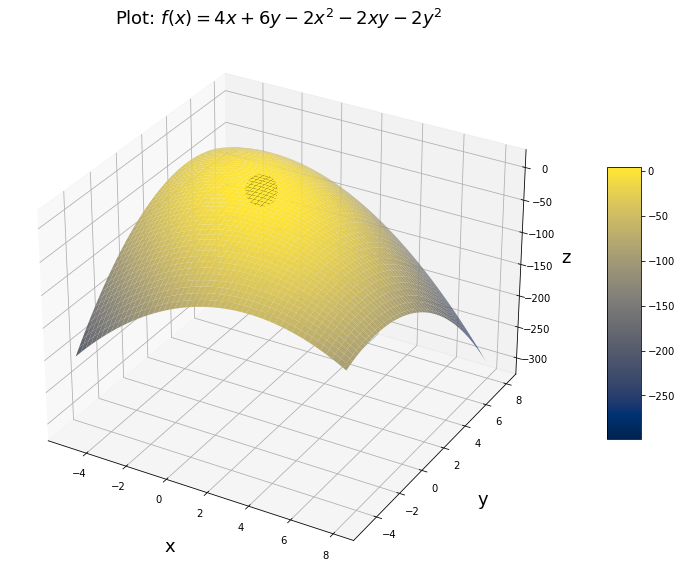

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

g = lambda x1, x2: 4*x1 +6*x2 - 2*(x1**2) - 2*x1*x2 -2*(x2**2)
x = np.linspace(-5,8,100)
y = x.copy()

x1, x2 = np.meshgrid(x,y)
Z = 4*x1 + 6*x2 -2*(x1**2)-(2*x1*x2)-2*(x2**2)

plt.title('Plot: $f(x) = 4x+6y-2x^2-2xy-2y^2$', fontsize=18)
surf = ax.plot_surface(x1,x2,Z, cmap= plt.cm.cividis)
ax.scatter(xstar,ystar,g(xstar,ystar),marker='o', c = 'black', s = 1000)

# set axes label
ax.set_xlabel('x', labelpad=20, fontsize=18)
ax.set_ylabel('y', labelpad=20, fontsize=18)
ax.set_zlabel('z', labelpad=7, fontsize=18)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

### As we can see from the above graph the maximum exists at the circle. 